In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit


# FLIGHT COMPUTER
OpenFile = open("press_fc_asc.dat", "r")  
y_asc_arr = eval(OpenFile.read())
y_asc = [ float(i)*0.01 for i in y_asc_arr]


OpenFile = open("press_fc_desc.dat", "r")  
y_desc_arr = eval(OpenFile.read())
y_desc = [ float(i)*0.01 for i in y_desc_arr]

#EXTERNAL
OpenFile = open("press_ext_asc.dat", "r")  
y_ext_asc_arr = eval(OpenFile.read())
y_ext_asc = [ float(i)*0.01 for i in y_ext_asc_arr]


OpenFile = open("press_ext_desc.dat", "r")  
y_ext_desc_arr = eval(OpenFile.read())
y_ext_desc = [ float(i)*0.01 for i in y_ext_desc_arr]

# TEMPERATURE
OpenFile = open("temp_ext_asc.dat", "r")  
y_temp_ext_asc_arr = eval(OpenFile.read())
y_temp_ext_asc = [ float(i)*0.01 for i in y_temp_ext_asc_arr]

OpenFile = open("temp_fc_asc.dat", "r")  
y_temp_fc_asc_arr = eval(OpenFile.read())
y_temp_fc_asc = [ float(i)*0.01 for i in y_temp_fc_asc_arr]


In [2]:

# Input data
#create X values with the exact same length as the Y data
# FLIGHT COMPUTER
x_asc = [float(i*4.1055/60) for i in range(len(y_asc))]
x_desc = [float(i*4.1055/60) for i in range(len(y_desc))]

#EXTERNAL
x_ext_asc = [float(i*4.1055/60) for i in range(len(y_ext_asc))]
x_ext_desc = [float(i*4.1055/60) for i in range(len(y_ext_desc))]


In [3]:

# Perform exponential regression


# FLIGHT COMPUTER
# exponential fit to ascend pressure
p_asc = np.polyfit(x_asc, np.log(y_asc), 1,w=np.sqrt(y_asc))
a_asc = np.exp(p_asc[1])
b_asc = p_asc[0]

p_asc_nw = np.polyfit(x_asc, np.log(y_asc), 1)
a_asc_nw = np.exp(p_asc_nw[1])
b_asc_nw = p_asc_nw[0]

def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

# STARTING COEFFICIENTS!
p0 = (1022.,0.,6)
opt, pcov = curve_fit(model_func, x_asc, y_asc, p0)
a_fc_curve = opt[0]
b_fc_curve = opt[1]
c_fc_curve = opt[2]


# quadratic fit to descend pressure
#p_desc = np.polyfit(x_desc, y_desc, 2)

#EXTERNAL
# exponential fit to ascend pressure
p_ext_asc = np.polyfit(x_ext_asc, np.log(y_ext_asc), 1,w=np.sqrt(y_ext_asc))
a_ext_asc = np.exp(p_ext_asc[1])
b_ext_asc = p_ext_asc[0]

p_ext_asc_nw = np.polyfit(x_ext_asc, np.log(y_ext_asc), 1)
a_ext_asc_nw = np.exp(p_ext_asc_nw[1])
b_ext_asc_nw = p_ext_asc_nw[0]

# STARTING COEFFICIENTS!
p0 = (1022.,0.,6)
opt, pcov = curve_fit(model_func, x_ext_asc, y_ext_asc, p0)
a_ext_curve = opt[0]
b_ext_curve = opt[1]
c_ext_curve = opt[2]

# exponential fit to descend pressure
#p_ext_desc = np.polyfit(x_ext_desc, y_ext_desc, 2)



FLIGHT COMPUTER
ASC R_squared linear (polyfit w/o weight):0.971407132835773
ASC linear (polyfit w/o weight) eq: 1153.7461422189906*e(-0.05279193907074252*t)
ASC R_squared linear (polyfit with weight):0.996229471992883
ASC linear (polyfit with weight) eq: 1022.267204160854*e(-0.048779433226427575*t)
ASC R_squared nonlinear (curve_fit):0.9989768621422673
ASC nonlinear (curve_fit) eq: -16.953440282793142 + 984.9607598210572*e(-0.04336774264131374*t)


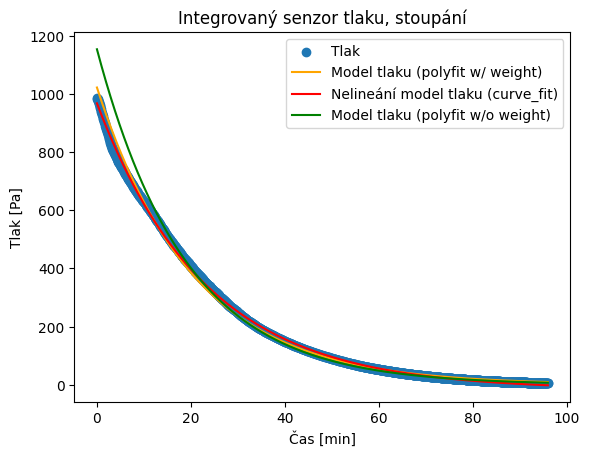

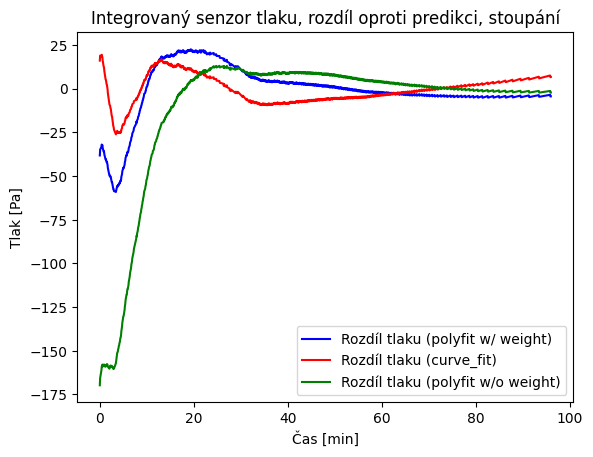


 
 
EXTERNAL SENSOR
ASC R_squared linear (polyfit w/o weight):0.9822428855515081
ASC linear (polyfit w/o weight) eq: 1114.252717822915*e(-0.0517728939236764*t) 
ASC R_squared linear (polyfit with weight):0.9964894885710691
ASC linear (polyfit with weight) eq: 1016.7303777446929*e(-0.04872228197748485*t) 
ASC R_squared nonlinear (curve_fit):0.9989591203037071
ASC linear (polyfit with weight) eq: -15.857142365294003 + 981.8752377888782*e(-0.04361423818568163*t)


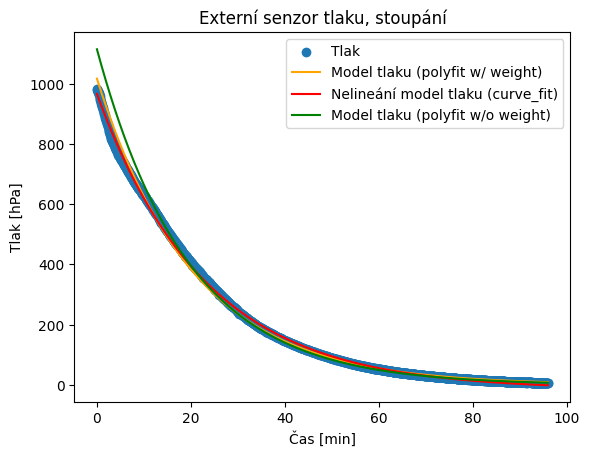

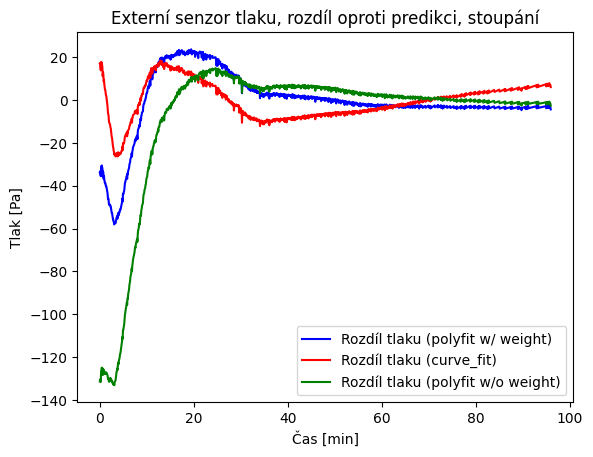

In [4]:
# Plot original data and exponential regression line



# FLIGHT COMPUTER
print("FLIGHT COMPUTER")
#plotting the ascend
plt.scatter(x_asc, y_asc)
x_asc = np.array(x_asc, dtype=float)
y_asc = np.array(y_asc, dtype=int)

y_pred_asc_nw = a_asc_nw * np.exp((b_asc_nw * x_asc))
y_pred_asc = a_asc * np.exp((b_asc * x_asc))
y_pred_fc_curve = a_fc_curve * np.exp(-b_fc_curve * x_asc) + c_fc_curve

plt.xlabel("Čas [min]")
plt.ylabel("Tlak [Pa]")
plt.title("Integrovaný senzor tlaku, stoupání")
plt.plot(x_asc, y_pred_asc, c='orange')
plt.plot(x_asc, y_pred_fc_curve, c='red')
plt.plot(x_asc, y_pred_asc_nw, c='green')
plt.legend(["Tlak", "Model tlaku (polyfit w/ weight)","Nelineání model tlaku (curve_fit)","Model tlaku (polyfit w/o weight)"])
plt.savefig('press_fc_asc.png')
# R^2 is a measure of the quality of the fit
print("ASC R_squared linear (polyfit w/o weight):" + str(r2_score(y_asc,y_pred_asc_nw)))
print("ASC linear (polyfit w/o weight) eq: {}*e({}*t)".format(a_asc_nw, b_asc_nw))
print("ASC R_squared linear (polyfit with weight):" + str(r2_score(y_asc,y_pred_asc)))
print("ASC linear (polyfit with weight) eq: {}*e({}*t)".format(a_asc, b_asc))
print("ASC R_squared nonlinear (curve_fit):" + str(r2_score(y_asc,y_pred_fc_curve)))
print("ASC nonlinear (curve_fit) eq: {} + {}*e(-{}*t)".format(c_fc_curve,a_fc_curve,b_fc_curve))
plt.show()

#plotting the ascend difference
y_asc_diff = y_asc - y_pred_asc
y_asc_dif_curve = y_asc - y_pred_fc_curve
y_asc_dif_nw = y_asc - y_pred_asc_nw
plt.plot(x_asc, y_asc_diff,  c='blue')
plt.plot(x_asc, y_asc_dif_curve,  c='red')
plt.plot(x_asc, y_asc_dif_nw,  c='green')
plt.xlabel("Čas [min]")
plt.ylabel("Tlak [Pa]")
plt.title("Integrovaný senzor tlaku, rozdíl oproti predikci, stoupání")
plt.legend(["Rozdíl tlaku (polyfit w/ weight)", "Rozdíl tlaku (curve_fit)","Rozdíl tlaku (polyfit w/o weight)"])
plt.savefig('press_fc_asc_pred_diff.png')
plt.show()


#EXTERNAL
print("\n \n \nEXTERNAL SENSOR")


#plotting the ascend
plt.scatter(x_ext_asc, y_ext_asc)
x_ext_asc = np.array(x_ext_asc, dtype=float)
y_ext_asc = np.array(y_ext_asc, dtype=int)

y_pred_ext_asc_nw = a_ext_asc_nw * np.exp((b_ext_asc_nw * x_ext_asc))
y_pred_ext_asc = a_ext_asc * np.exp((b_ext_asc * x_asc))
y_pred_ext_curve = a_ext_curve * np.exp(-b_ext_curve * x_asc) + c_ext_curve
plt.xlabel("Čas [min]")
plt.ylabel("Tlak [hPa]")
plt.plot(x_ext_asc, y_pred_ext_asc, c='orange')
plt.plot(x_ext_asc, y_pred_ext_curve, c='red')
plt.plot(x_ext_asc, y_pred_ext_asc_nw, c='green')
plt.title("Externí senzor tlaku, stoupání")
plt.legend(["Tlak", "Model tlaku (polyfit w/ weight)","Nelineání model tlaku (curve_fit)","Model tlaku (polyfit w/o weight)"])
plt.savefig('press_ext_asc.png')
# R^2 is a measure of the quality of the fit
print("ASC R_squared linear (polyfit w/o weight):" + str(r2_score(y_asc,y_pred_ext_asc_nw)))
print("ASC linear (polyfit w/o weight) eq: {}*e({}*t) ".format(a_ext_asc_nw, b_ext_asc_nw))

print("ASC R_squared linear (polyfit with weight):" + str(r2_score(y_asc,y_pred_ext_asc)))
print("ASC linear (polyfit with weight) eq: {}*e({}*t) ".format(a_ext_asc, b_ext_asc))

print("ASC R_squared nonlinear (curve_fit):" + str(r2_score(y_asc,y_pred_ext_curve)))
print("ASC linear (polyfit with weight) eq: {} + {}*e(-{}*t)".format(c_ext_curve,a_ext_curve,b_ext_curve))

plt.show()

#plotting the ascend difference
y_ext_asc_diff = y_ext_asc - y_pred_ext_asc
y_ext_asc_dif_curve = y_ext_asc - y_pred_ext_curve
y_ext_asc_dif_nw = y_ext_asc - y_pred_ext_asc_nw
plt.plot(x_asc, y_ext_asc_diff,  c='blue')
plt.plot(x_asc, y_ext_asc_dif_curve,  c='red')
plt.plot(x_asc, y_ext_asc_dif_nw,  c='green')
plt.xlabel("Čas [min]")
plt.ylabel("Tlak [Pa]")
plt.title("Externí senzor tlaku, rozdíl oproti predikci, stoupání")
plt.legend(["Rozdíl tlaku (polyfit w/ weight)", "Rozdíl tlaku (curve_fit)","Rozdíl tlaku (polyfit w/o weight)"])
plt.savefig('press_ext_asc_pred_diff.png')
plt.show()



 
 \INTERNAL SENSOR


Correlation coefficient: 0.18250521553230412


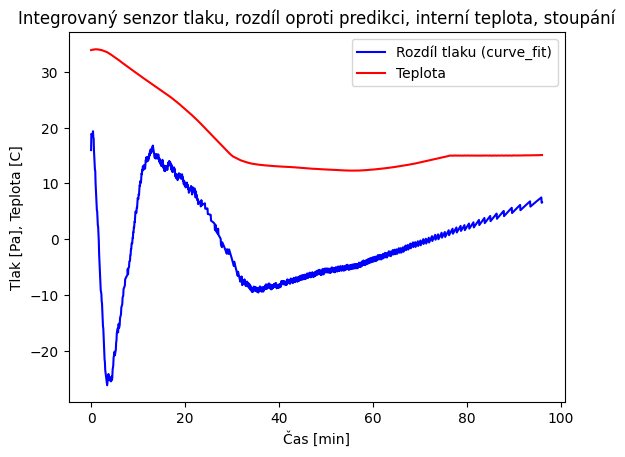


 
 
EXTERNAL SENSOR
Correlation coefficient: 0.3023651972712668


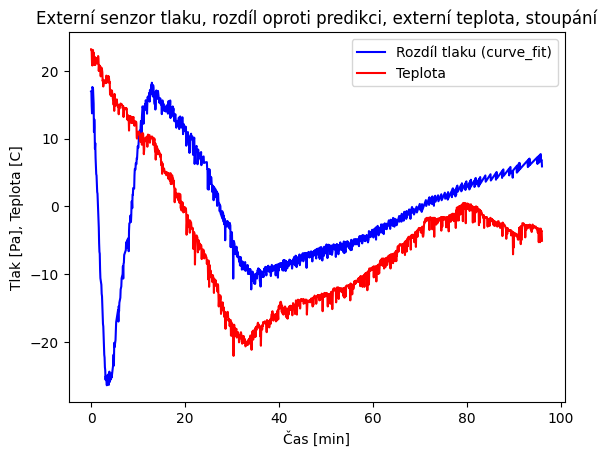

In [5]:
# Calculate the correlation coefficient
import pandas as pd


# FLIGHT COMPUTER
print("\n \n \INTERNAL SENSOR")
data = pd.DataFrame({
    "diff": y_asc_dif_curve,
    "temp": y_temp_fc_asc,
})

correlation_fc = data['diff'].corr(data['temp'])
print(f"\n\nCorrelation coefficient: {correlation_fc}")

plt.plot(x_asc, data['diff'],  c='blue')
plt.plot(x_asc, data['temp'],  c='red')
plt.xlabel("Čas [min]")
plt.ylabel("Tlak [Pa], Teplota [C]")
plt.title("Integrovaný senzor tlaku, rozdíl oproti predikci, interní teplota, stoupání")
plt.legend(["Rozdíl tlaku (curve_fit)", "Teplota"])
plt.savefig('press_fc_asc_corr.png')
plt.show()

#EXTERNAL
print("\n \n \nEXTERNAL SENSOR")
data = pd.DataFrame({
    "diff": y_ext_asc_dif_curve,
    "temp": y_temp_ext_asc,
})

correlation = data['diff'].corr(data['temp'])
print(f"Correlation coefficient: {correlation}")

plt.plot(x_asc, data['diff'],  c='blue')
plt.plot(x_asc, data['temp'],  c='red')
plt.xlabel("Čas [min]")
plt.ylabel("Tlak [Pa], Teplota [C]")
plt.title("Externí senzor tlaku, rozdíl oproti predikci, externí teplota, stoupání")
plt.legend(["Rozdíl tlaku (curve_fit)", "Teplota"])
plt.savefig('press_ext_asc_corr.png')
plt.show()